# Installations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 26.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install nltk
! pip install scikit-learn
! pip install tensorflow

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import randint
import tensorflow as tf

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

In [ ]:
# Download necessary tools from NLTK
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# Data Exploration and Visualization

### Load data 

In [ ]:
train = pd.read_csv('train.csv')

### Exploration

In [ ]:
train.head()

,overall,Review
0,5,This a really cool (but time-tested) design. T...
1,5,I liked the first pair so well I bought severa...
2,4,I took them to the range to put them to the te...
3,5,What can you say about a yoga block? These ar...
4,5,After reading many reviews I decided on this l...


In [ ]:
train.describe()

,overall
count,222243.000000
mean,4.394771
std,0.985039
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222243 entries, 0 to 222242
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   overall  222243 non-null  int64 
 1   Review   222243 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [ ]:
train.loc[2]

overall                                                    4
Review     I took them to the range to put them to the te...
Name: 2, dtype: object

In [ ]:
train.loc[2, 'overall']

4

In [ ]:
totalCount = train['overall'].count()
print('Total number of reviews/ratings: ', totalCount)

Total number of reviews/ratings:  222243


In [ ]:
count5 = train[train['overall']==5]['overall'].count()
count4 = train[train['overall']==4]['overall'].count()
count3 = train[train['overall']==3]['overall'].count()
count2 = train[train['overall']==2]['overall'].count()
count1 = train[train['overall']==1]['overall'].count()

print('Total number of reviews with 5 star rating: ', count5)
print('Total number of reviews with 4 star rating: ', count4)
print('Total number of reviews with 3 star rating: ', count3)
print('Total number of reviews with 2 star rating: ', count2)
print('Total number of reviews with 1 star rating: ', count1)

count5+count4+count3+count2+count1==totalCount

Total number of reviews with 5 star rating:  141169
Total number of reviews with 4 star rating:  48748
Total number of reviews with 3 star rating:  17947
Total number of reviews with 2 star rating:  7650
Total number of reviews with 1 star rating:  6729


True

In [ ]:
percent5 = format((count5/totalCount)*100, '.2f')
percent4 = format((count4/totalCount)*100, '.2f')
percent3 = format((count3/totalCount)*100, '.2f')
percent2 = format((count2/totalCount)*100, '.2f')
percent1 = format((count1/totalCount)*100, '.2f')

print('Percentage of reviews with 5 star rating: ', percent5)
print('Percentage of reviews with 4 star rating: ', percent4)
print('Percentage of reviews with 3 star rating: ', percent3)
print('Percentage of reviews with 2 star rating: ', percent2)
print('Percentage of reviews with 1 star rating: ', percent1)

Percentage of reviews with 5 star rating:  63.52
Percentage of reviews with 4 star rating:  21.93
Percentage of reviews with 3 star rating:  8.08
Percentage of reviews with 2 star rating:  3.44
Percentage of reviews with 1 star rating:  3.03


### Visualization

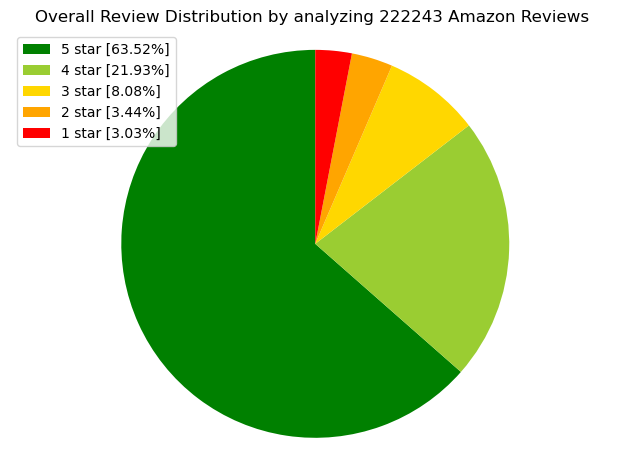

In [ ]:
## Print the Pie Chart ##
    
labels = ['5 star ['+str(percent5)+'%]', 
          '4 star ['+str(percent4)+'%]', 
          '3 star ['+str(percent3)+'%]',
          '2 star ['+str(percent2)+'%]',
          '1 star ['+str(percent1)+'%]', ]

sizes = [percent5, percent4, percent3, percent2, percent1]
colors = ['green', 'yellowgreen', 'gold', 'orange', 'red']
patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title("Overall Review Distribution by analyzing " + str(totalCount) + " Amazon Reviews ")
plt.axis('equal')
plt.tight_layout()
plt.show()

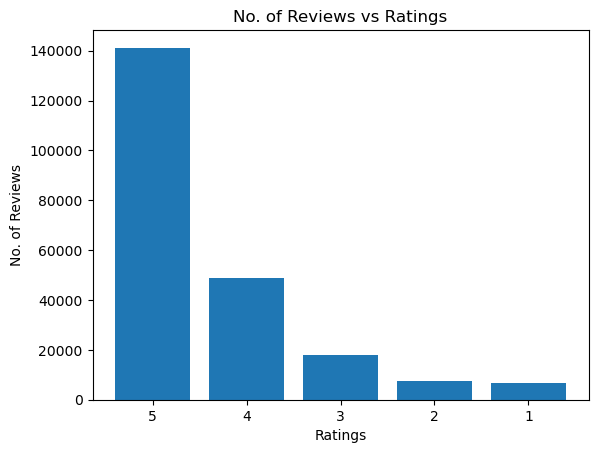

In [ ]:
# data to plot
labels = ['5', '4', '3', '2', '1']
values = [count5, count4, count3, count2, count1]

# create a bar chart
plt.bar(labels, values)

# set title and axis labels
plt.title('No. of Reviews vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('No. of Reviews')

# display the plot
plt.show()

# Text processing and Normalization

In [ ]:
X = train['Review']
y = train['overall']

In [ ]:
X.head()

0    This a really cool (but time-tested) design. T...
1    I liked the first pair so well I bought severa...
2    I took them to the range to put them to the te...
3    What can you say about a yoga block?  These ar...
4    After reading many reviews I decided on this l...
Name: Review, dtype: object

In [ ]:
y.head()

0    5
1    5
2    4
3    5
4    5
Name: overall, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(177794,)

### Removing stop words, punctuations, Urls, mentions, tags

In [ ]:
# Define function to perform text processing
def process_text(text):

# Define stop words
    stop_words = set(stopwords.words('english'))

    # Define regular expression for removing punctuation
    punct_pattern = re.compile(r'[^\w\s]')

    # Define regular expression for removing URLs and mentions
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    mention_pattern = re.compile(r'@[A-Za-z0-9_]+')
    hash_pattern = re.compile(r'#[A-Za-z0-9_]+')

    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = url_pattern.sub('', text)

    # Remove user mentions
    text = mention_pattern.sub('', text)

    # Remove hashtags
    text = hash_pattern.sub('', text)

    # remove numbers
    text = ''.join((z for z in text if not z.isdigit()))
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove punctuation
    tokens = [punct_pattern.sub('', token) for token in tokens]
    
    # Remove any remaining empty tokens
    tokens = [token for token in tokens if token]

    # Join tokens back into a single string
    text_processed = ' '.join(tokens)
    
    return text_processed

In [ ]:
process_train = []
for review in X_train:
    process_train.append(process_text(review))

len(process_train)

177794

In [ ]:
print("Raw text: ")
print(X_train.iloc[0])
print("")
print("Processed text: ")
print(process_train[0])

Raw text: 
Not very clear in the pictures but the top area just over the head is a camo portion that is pretty corny looking.  its the &#34;old school&#34; type of camo.  Other than that its a net and not much more to say. Pretty good for the price.

Processed text: 
clear pictures top area head camo portion pretty corny looking old school type camo net much say pretty good price


### Stemming

In [ ]:
stemmer = SnowballStemmer('english')



def stem(text):

    # Tokenize text
    tokens = nltk.word_tokenize(text)
        
    # Stem words
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Remove any remaining empty tokens
    tokens = [token for token in tokens if token]

    # Join tokens back into a single string
    text_processed = ' '.join(tokens)

    return text_processed


In [ ]:
normalized_process_train_stem = []

for review in process_train:
    normalized_process_train_stem.append(stem(review))

### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize(text):
            
    # Tokenize text
    tokens = nltk.word_tokenize(text)
        
    # Stem words
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove any remaining empty tokens
    tokens = [token for token in tokens if token]

    # Join tokens back into a single string
    text_processed = ' '.join(tokens)

    return text_processed

In [ ]:
lemma_process_train = []
for review in process_train:
    lemma_process_train.append(lemmatize(review))

In [ ]:
print("Raw text: ")
print(X_train.iloc[0])
print("")
print("Processed text: ")
print(process_train[0])
print("")
print("Processed Stemming text: ")
print(normalized_process_train_stem[0])
print("")
print("Processed Lemmatized text: ")
print(lemma_process_train[0])

Raw text: 
Not very clear in the pictures but the top area just over the head is a camo portion that is pretty corny looking.  its the &#34;old school&#34; type of camo.  Other than that its a net and not much more to say. Pretty good for the price.

Processed text: 
clear pictures top area head camo portion pretty corny looking old school type camo net much say pretty good price

Processed Stemming text: 
clear pictur top area head camo portion pretti corni look old school type camo net much say pretti good price

Processed Lemmatized text: 
clear picture top area head camo portion pretty corny looking old school type camo net much say pretty good price


In [ ]:
test=pd.read_csv('test.csv') # submission of majority class 

In [ ]:
final_submission=pd.read_csv('sample_submission.csv')

In [ ]:
test_final = test['Review']

In [ ]:
process_test_final = []
for review in test_final:
    process_test_final.append(process_text(review))

In [ ]:
lemma_process_test_final = []
for review in process_test_final:
    lemma_process_test_final.append(lemmatize(review))

# Save best output

In [ ]:
def save_output(model, test_set, vector):
    y_final = model.predict(vector.transform(test_set))
    final_submission=pd.read_csv('sample_submission.csv')
    final_submission['overall'] = y_final # save the labels for your model to csv file, you willl use this for you Kaggle competition submission
    final_submission.to_csv('final_submission.csv', index=False)

# Vector space Model and feature representation

### Bag of words representation

In [ ]:
# CountVectorizer object
vect =  CountVectorizer(min_df=15) 
vect.fit(lemma_process_train)
print("Vocabulary size: {}".format(len(vect.vocabulary_)))

Vocabulary size: 13754


In [ ]:
print("Vocabulary content:\n {}".format(vect.vocabulary_["aa"]))

Vocabulary content:
 0


In [ ]:
bag_of_words = vect.transform(lemma_process_train)
bag_of_words

<177794x13754 sparse matrix of type '<class 'numpy.int64'>'
	with 6366581 stored elements in Compressed Sparse Row format>

In [ ]:
# print("Dense representation of bag_of_words:\n{}".format(
#     bag_of_words.toarray()))

In [ ]:
# Convert the sparse matrix to a dense matrix and print the output
df = pd.DataFrame(bag_of_words.todense(), columns=vect.get_feature_names_out())
print(df)

        aa  aaa  ab  ability  able  absolute  absolutely  absorb  absorbent  \
0        0    0   0        0     0         0           0       0          0   
1        0    0   0        0     0         0           0       0          0   
2        0    0   0        0     0         0           0       0          0   
3        0    0   0        0     0         0           0       0          0   
4        0    0   0        0     1         0           0       0          0   
...     ..  ...  ..      ...   ...       ...         ...     ...        ...   
177789   0    0   0        0     0         0           0       0          0   
177790   0    0   0        0     0         0           0       0          0   
177791   0    0   0        0     0         0           0       0          0   
177792   0    0   0        0     0         0           0       0          0   
177793   0    0   0        1     0         0           0       0          0   

        absorbing  ...  zip  ziplock  zipped  zippe

In [ ]:
process_test = []
for review in X_test:
    process_test.append(process_text(review))

In [ ]:
lemma_process_test = []
for review in process_test:
    lemma_process_test.append(lemmatize(review))

##### Logistic regression

In [ ]:
# Train and evaluate a logistic regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(bag_of_words, y_train)
lr_pred = lr.predict(vect.transform(lemma_process_test))
precision_lr = precision_score(y_test, lr_pred, average='macro')
recall_lr = recall_score(y_test, lr_pred, average='macro')
f1_lr = f1_score(y_test, lr_pred, average='macro')
acc_lr = accuracy_score(y_test, lr_pred)

c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Logistic Regression: ')
print('Precision: {:.2f}'.format(precision_lr))
print('Recall: {:.2f}'.format(recall_lr))
print('F1-score: {:.2f}'.format(f1_lr))
print('Accuracy: {:.2f}'.format(acc_lr))

Logistic Regression: 
Precision: 0.48
Recall: 0.42
F1-score: 0.44
Accuracy: 0.68


Hyper-parameter tuning

In [ ]:
# define your logistic regression model
lr_cv = LogisticRegression()

# define the hyperparameters you want to tune and their range of values
hyperparameters = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2']
}

# define your hyperparameter tuning process
clf = RandomizedSearchCV(
    lr_cv, 
    hyperparameters, 
    n_iter=100, 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

# fit the hyperparameter tuning process to your data
clf.fit(bag_of_words, y_train)

# get the best hyperparameters and the best score achieved
best_params = clf.best_params_
best_score = clf.best_score_



c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\li

TypeError: sklearn.linear_model._logistic.LogisticRegression() argument after ** must be a mapping, not numpy.float64

In [ ]:
# create a new logistic regression model with the best hyperparameters
best_lr = LogisticRegression(**best_params)

# train the model with the entire training set
best_lr.fit(bag_of_words, y_train)

lr_pred_best = best_lr.predict(vect.transform(lemma_process_test))
precision_lr_best = precision_score(y_test, lr_pred_best, average='macro')
recall_lr_best = recall_score(y_test, lr_pred_best, average='macro')
f1_lr_best = f1_score(y_test, lr_pred_best, average='macro')
acc_lr_best = accuracy_score(y_test, lr_pred_best)

c:\Users\sadiq\anaconda3\envs\tensorProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Logistic Regression CV: ')
print('Precision: {:.2f}'.format(precision_lr_best))
print('Recall: {:.2f}'.format(recall_lr_best))
print('F1-score: {:.2f}'.format(f1_lr_best))
print('Accuracy: {:.2f}'.format(acc_lr_best))

Logistic Regression CV: 
Precision: 0.51
Recall: 0.42
F1-score: 0.45
Accuracy: 0.70


In [ ]:
y_final = best_lr.predict(vect.transform(lemma_process_test_final))

In [ ]:
final_submission['overall'] = y_final # save the labels for your model to csv file, you willl use this for you Kaggle competition submission

final_submission.to_csv('final_submission.csv', index=False)

##### Naive Bayes

In [ ]:
# Train and evaluate a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(bag_of_words, y_train)
y_pred_nb = nb.predict(vect.transform(lemma_process_test))
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')
acc_nb = accuracy_score(y_test, y_pred_nb)

In [ ]:
print('Naive Bayes: ')
print('Precision: {:.2f}'.format(precision_nb))
print('Recall: {:.2f}'.format(recall_nb))
print('F1-score: {:.2f}'.format(f1_nb))
print('Accuracy: {:.2f}'.format(acc_nb))

Naive Bayes: 
Precision: 0.43
Recall: 0.44
F1-score: 0.42
Accuracy: 0.66


Hyper-param tuning

In [ ]:
# create a Multinomial Naive Bayes classifier
nb = MultinomialNB()

# define the parameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_prior': [True, False]
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(bag_of_words, y_train)

# print the best hyperparameters and accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'alpha': 10, 'fit_prior': True}
Best accuracy score:  0.6640325393599831


In [ ]:
# create a new logistic regression model with the best hyperparameters
best_nb = MultinomialNB(**grid_search.best_params_)

# train the model with the entire training set
best_nb.fit(bag_of_words, y_train)

nb_pred_best = best_nb.predict(vect.transform(lemma_process_test))
precision_nb_best = precision_score(y_test, nb_pred_best, average='macro')
recall_nb_best = recall_score(y_test, nb_pred_best, average='macro')
f1_nb_best = f1_score(y_test, nb_pred_best, average='macro')
acc_nb_best = accuracy_score(y_test, nb_pred_best)

In [ ]:
print('Naive Bayes hyper-param tuning: ')
print('Precision: {:.2f}'.format(precision_nb_best))
print('Recall: {:.2f}'.format(recall_nb_best))
print('F1-score: {:.2f}'.format(f1_nb_best))
print('Accuracy: {:.2f}'.format(acc_nb_best))

Naive Bayes hyper-param tuning: 
Precision: 0.46
Recall: 0.35
F1-score: 0.37
Accuracy: 0.67


In [ ]:
save_output(best_nb, lemma_process_test_final, vect)

##### Random forest classifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

# train the model with the entire training set
rfc.fit(bag_of_words, y_train)

rfc_pred_best = rfc.predict(vect.transform(lemma_process_test))
precision_rfc_best = precision_score(y_test, rfc_pred_best, average='macro')
recall_rfc_best = recall_score(y_test, rfc_pred_best, average='macro')
f1_rfc_best = f1_score(y_test, rfc_pred_best, average='macro')
acc_rfc_best = accuracy_score(y_test, rfc_pred_best)

In [ ]:
print('RFC: ')
print('Precision: {:.2f}'.format(precision_rfc_best))
print('Recall: {:.2f}'.format(recall_rfc_best))
print('F1-score: {:.2f}'.format(f1_rfc_best))
print('Accuracy: {:.2f}'.format(acc_rfc_best))

RFC: 
Precision: 0.63
Recall: 0.27
F1-score: 0.29
Accuracy: 0.67


Hyper param tuning

In [ ]:
pipeline = Pipeline([
    ('cv', CountVectorizer(min_df=15)),
    ('rfc', RandomForestClassifier())
])

param_grid = {
    'rfc__n_estimators': randint(100, 1000),
    'rfc__max_depth': [10, 20, 30, 40, None],
    'rfc__max_features': ['auto', 'sqrt'],
    'rfc__min_samples_leaf': [1, 2, 4],
    'rfc__min_samples_split': [2, 5, 10],
    'rfc__bootstrap': [True, False]
}


search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42)
search.fit(X_train, y_train)

best_model = search.best_estimator_

# rfc_pred_best = best_model.predict(vect.transform(lemma_process_test))
# precision_rfc_best = precision_score(y_test, rfc_pred_best, average='macro')
# recall_rfc_best = recall_score(y_test, rfc_pred_best, average='macro')
# f1_rfc_best = f1_score(y_test, rfc_pred_best, average='macro')
# acc_rfc_best = accuracy_score(y_test, rfc_pred_best)

AttributeError: lower not found

In [ ]:
accuracy = best_model.score(lemma_process_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6507008031676753


In [ ]:
# save_output(best_nb, lemma_process_test_final, vect)

### Tf-idf vectorization

In [ ]:
vectorizer = TfidfVectorizer(min_df=15)

tfidf_representation_train = vectorizer.fit_transform(lemma_process_train)

In [ ]:
# Convert the sparse matrix to a dense matrix and print the output
temp_df = pd.DataFrame(tfidf_representation_train.todense(), columns=vectorizer.get_feature_names())
print(temp_df)

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


         aa  aaa  aac   ab  abandoned  abc  abdomen  abdominal  abec  abf  \
0       0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
1       0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
2       0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
3       0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
4       0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
...     ...  ...  ...  ...        ...  ...      ...        ...   ...  ...   
177789  0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
177790  0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
177791  0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
177792  0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   
177793  0.0  0.0  0.0  0.0        0.0  0.0      0.0        0.0   0.0  0.0   

        ...  zipties   zk  zombie  zone  zoom  zoomed  zooming   zt  zumba 

In [ ]:
process_test = []
for review in X_test:
    process_test.append(process_text(review))

In [ ]:
lemma_process_test = []
for review in process_test:
    lemma_process_test.append(lemmatize(review))

##### Logistic Regression

In [ ]:
# Train and evaluate a logistic regression classifier
lr = LogisticRegression(max_iter=1000)
lr.fit(tfidf_representation_train, y_train)
lr_pred = lr.predict(vectorizer.transform(lemma_process_test))
precision_lr = precision_score(y_test, lr_pred, average='macro')
recall_lr = recall_score(y_test, lr_pred, average='macro')
f1_lr = f1_score(y_test, lr_pred, average='macro')
acc_lr = accuracy_score(y_test, lr_pred)


In [ ]:
print('Logistic Regression: ')
print('Precision: {:.2f}'.format(precision_lr))
print('Recall: {:.2f}'.format(recall_lr))
print('F1-score: {:.2f}'.format(f1_lr))
print('Accuracy: {:.2f}'.format(acc_lr))

Logistic Regression: 
Precision: 0.54
Recall: 0.41
F1-score: 0.45
Accuracy: 0.70


Hyper param tuning

In [ ]:
# define your logistic regression model
lr_cv = LogisticRegression()

# define the hyperparameters you want to tune and their range of values
hyperparameters = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2']
}

# define your hyperparameter tuning process
clf = RandomizedSearchCV(
    lr_cv, 
    hyperparameters, 
    n_iter=100, 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

# fit the hyperparameter tuning process to your data
clf.fit(tfidf_representation_train, y_train)

# get the best hyperparameters and the best score achieved
best_params = clf.best_params_
best_score = clf.best_score_


c:\Users\sayed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sayed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sayed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sayed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

In [ ]:
# create a new logistic regression model with the best hyperparameters
best_lr = LogisticRegression(**best_params)

# train the model with the entire training set
best_lr.fit(tfidf_representation_train, y_train)

lr_pred_best = best_lr.predict(vectorizer.transform(lemma_process_test))
precision_lr_best = precision_score(y_test, lr_pred_best, average='macro')
recall_lr_best = recall_score(y_test, lr_pred_best, average='macro')
f1_lr_best = f1_score(y_test, lr_pred_best, average='macro')
acc_lr_best = accuracy_score(y_test, lr_pred_best)

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Logistic Regression: ')
print('Precision: {:.2f}'.format(precision_lr_best))
print('Recall: {:.2f}'.format(recall_lr_best))
print('F1-score: {:.2f}'.format(f1_lr_best))
print('Accuracy: {:.2f}'.format(acc_lr_best))

Logistic Regression: 
Precision: 0.53
Recall: 0.40
F1-score: 0.44
Accuracy: 0.70


bi-gram

In [ ]:
vectorizer = TfidfVectorizer(min_df=15, ngram_range=(2, 2))

tfidf_representation_train = vectorizer.fit_transform(lemma_process_train)

In [ ]:
# define your logistic regression model
lr_cv = LogisticRegression()

# define the hyperparameters you want to tune and their range of values
hyperparameters = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2']
}

# define your hyperparameter tuning process
clf = RandomizedSearchCV(
    lr_cv, 
    hyperparameters, 
    n_iter=100, 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

# fit the hyperparameter tuning process to your data
clf.fit(tfidf_representation_train, y_train)

# get the best hyperparameters and the best score achieved
best_params = clf.best_params_
best_score = clf.best_score_


c:\Users\sayed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
215 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
215 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sayed\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sayed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\sayed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

In [ ]:
# create a new logistic regression model with the best hyperparameters
best_lr = LogisticRegression(**best_params)

# train the model with the entire training set
best_lr.fit(tfidf_representation_train, y_train)

lr_pred_best = best_lr.predict(vectorizer.transform(lemma_process_test))
precision_lr_best = precision_score(y_test, lr_pred_best, average='macro')
recall_lr_best = recall_score(y_test, lr_pred_best, average='macro')
f1_lr_best = f1_score(y_test, lr_pred_best, average='macro')
acc_lr_best = accuracy_score(y_test, lr_pred_best)

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Logistic Regression: ')
print('Precision: {:.2f}'.format(precision_lr_best))
print('Recall: {:.2f}'.format(recall_lr_best))
print('F1-score: {:.2f}'.format(f1_lr_best))
print('Accuracy: {:.2f}'.format(acc_lr_best))

Logistic Regression: 
Precision: 0.56
Recall: 0.36
F1-score: 0.40
Accuracy: 0.69


##### Naive Bayes

In [ ]:
# Train and evaluate a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(tfidf_representation_train, y_train)
y_pred_nb = nb.predict(vectorizer.transform(lemma_process_test))
precision_nb = precision_score(y_test, y_pred_nb, average='macro')
recall_nb = recall_score(y_test, y_pred_nb, average='macro')
f1_nb = f1_score(y_test, y_pred_nb, average='macro')
acc_nb = accuracy_score(y_test, y_pred_nb)

In [ ]:
print('Naive Bayes: ')
print('Precision: {:.2f}'.format(precision_nb))
print('Recall: {:.2f}'.format(recall_nb))
print('F1-score: {:.2f}'.format(f1_nb))
print('Accuracy: {:.2f}'.format(acc_nb))

Naive Bayes: 
Precision: 0.69
Recall: 0.24
F1-score: 0.24
Accuracy: 0.66


Hyper-param tuning

In [ ]:
# create a Multinomial Naive Bayes classifier
nb = MultinomialNB()

# define the parameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_prior': [True, False]
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(tfidf_representation_train, y_train)

# print the best hyperparameters and accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.1, 'fit_prior': True}
Best accuracy score:  0.6727223734702079


In [ ]:
# create a new logistic regression model with the best hyperparameters
best_nb = MultinomialNB(**grid_search.best_params_)

# train the model with the entire training set
best_nb.fit(tfidf_representation_train, y_train)

nb_pred_best = best_nb.predict(vectorizer.transform(lemma_process_test))
precision_nb_best = precision_score(y_test, nb_pred_best, average='macro')
recall_nb_best = recall_score(y_test, nb_pred_best, average='macro')
f1_nb_best = f1_score(y_test, nb_pred_best, average='macro')
acc_nb_best = accuracy_score(y_test, nb_pred_best)

In [ ]:
print('Naive Bayes hyper-param tuning: ')
print('Precision: {:.2f}'.format(precision_nb_best))
print('Recall: {:.2f}'.format(recall_nb_best))
print('F1-score: {:.2f}'.format(f1_nb_best))
print('Accuracy: {:.2f}'.format(acc_nb_best))

Naive Bayes hyper-param tuning: 
Precision: 0.55
Recall: 0.30
F1-score: 0.32
Accuracy: 0.68


In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
test.head()

,id,Review
0,0,Bought for a Smith and Wesson M&P15 fits perfe...
1,1,Beware of the charts listed on Butler Creek's ...
2,2,I've only used this once to sight in a scope. ...
3,3,I need more of these!!! This thing makes shoot...
4,4,Grabber Outdoors Original Space Brand Sportsma...


### Vector space model bi-gram Tf-idf

In [ ]:
reviews = train['Review'].tolist()

reviews[:5]

["This a really cool (but time-tested) design. The carbon steel blade gets really sharp but does require maintenance from time to time. I oiled the locking screw-top and blade; after that it opens easily. I've been using mine for a couple of months now and am not disappointed. It's a solid knife and at an affordable price. Nice knife!",
 "I liked the first pair so well I bought several more. I have found it's usually worthwhile to buy the higher priced products in the long run and these socks are no exception. Better comfort, moisture wicking, arch support, etc. My go to sock in hot weather. I use these road, cx, & single track cycling Excellent",
 "I took them to the range to put them to the test. When you adjust the volume you can hear people talking without a problem and the shots are muffled. I tried them today mowing the lawn while having my music going. The sound of the music was really good. I was a little shocked.  Overall a great buy. I just ordered a second set for my wife. I

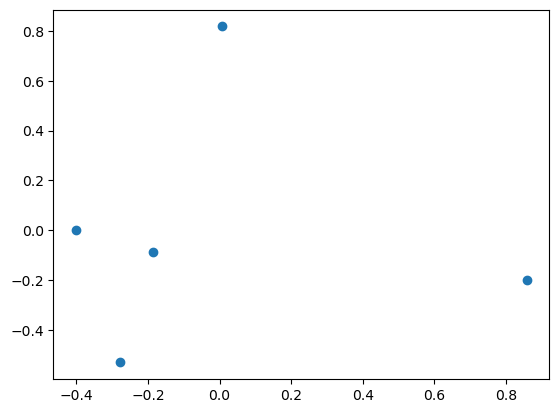

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create TfidfVectorizer object with bigram feature extraction
vectorizer = TfidfVectorizer(ngram_range=(2, 2))

# Fit the vectorizer to the text data and transform the text data into bigram tf-idf features
bigram_tfidf_features = vectorizer.fit_transform(reviews[:5])

# Print the bigram tf-idf features                                                                                                              
# print(bigram_tfidf_features.toarray())

# Convert the sparse matrix to a dense matrix and print the output
# df = pd.DataFrame(bigram_tfidf_features.todense(), columns=vectorizer.get_feature_names())
# print(df)

# Apply PCA to reduce the dimensionality of the feature space to two dimensions
pca = PCA(n_components=2)
bigram_tfidf_features_pca = pca.fit_transform(bigram_tfidf_features.toarray())

# Plot the data points on a scatter plot
plt.scatter(bigram_tfidf_features_pca[:, 0], bigram_tfidf_features_pca[:, 1])
plt.show()

In [ ]:
# ! pip install mglearn
# ! pip install joblib==1.1.0

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.pipeline import make_pipeline
# import mglearn as mglearn

# pipe = make_pipeline(TfidfVectorizer(min_df=5),
#                      LogisticRegression())

# param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

# grid = GridSearchCV(pipe, param_grid, cv=5)

# grid.fit(X_train, y_train)

# vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

# feature_names = np.array(vectorizer.get_feature_names_out())




# mglearn.tools.visualize_coefficients(
#     grid.best_estimator_.named_steps["logisticregression"].coef_,
#     feature_names, n_top_features=40)

# Save best output

In [ ]:
def save_output(model, test_set, vector):
    y_final = model.predict(vector.transform(test_set))
    final_submission=pd.read_csv('sample_submission.csv')
    final_submission['overall'] = y_final # save the labels for your model to csv file, you willl use this for you Kaggle competition submission
    final_submission.to_csv('final_submission.csv', index=False)

# Sequencial models

### Load data

In [ ]:
df = pd.read_csv('train.csv')

X = df['Review']
y= df['overall']

### One-hot encoding labels

In [ ]:
from tensorflow.keras.utils import to_categorical

# Define the list of labels
labels = y

# Create a dictionary to map each label to an integer
label_map = {label: i for i, label in enumerate(set(labels))}

# Convert the list of labels to integer labels
int_labels = [label_map[label] for label in labels]

# Convert the integer labels to one-hot encoding
one_hot_labels = to_categorical(int_labels, num_classes=len(set(labels)))

### Text as a sequence

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X)
data = pad_sequences(sequences)

### Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.2, random_state=42)

### Build LSTM model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# Define the model architecture
model = Sequential()
model.add(Embedding(len(word_index)+1, 64))
model.add(LSTM(64))
model.add(Dense(5, activation='softmax'))

In [ ]:
# Train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, np.array(y_train), batch_size=32, epochs=1)

5557/5557 [==============================] - 14026s 3s/step - loss: 0.7071 - accuracy: 0.7125


### Evaluate model

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 72.759789


### Run model on Test set save output to final_submission.csv

In [ ]:
labels = y

# Create a dictionary to map each label to an integer
label_map = {label: i for i, label in enumerate(set(labels))}

# Create the label_map_inv dictionary
label_map_inv = {v: k for k, v in label_map.items()}

In [ ]:
test_sequences = tokenizer.texts_to_sequences(test['Review'])
test_data = pad_sequences(test_sequences, maxlen=data.shape[1])


# Use the model to predict the categories of the test texts
predicted_probs = model.predict(test_data)
predicted_labels = np.argmax(predicted_probs, axis=1)
predicted_categories = [label_map_inv[label] for label in predicted_labels]


y_final = predicted_categories
final_submission=pd.read_csv('sample_submission.csv')
final_submission['overall'] = y_final # save the labels for your model to csv file, you willl use this for you Kaggle competition submission
final_submission.to_csv('final_submission.csv', index=False)

2316/2316 [==============================] - 643s 278ms/step


# Topic Modelling for five star ratings

In [ ]:
import gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

stopwords = set(gensim.parsing.preprocessing.STOPWORDS)
tokenized_text = [[word for word in gensim.utils.simple_preprocess(doc) if word not in stopwords] for doc in df[df['overall']==5]['Review']]
dictionary = gensim.corpora.Dictionary(tokenized_text)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenized_text]
lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=10, id2word=dictionary, passes=10)

# Create visualization
lda_display = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
pyLDAvis.display(lda_display)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
for topic in lda_model.print_topics():
    print(topic)

(0, '0.032*"bag" + 0.018*"case" + 0.013*"carry" + 0.012*"pack" + 0.011*"great" + 0.011*"belt" + 0.010*"use" + 0.010*"fit" + 0.009*"small" + 0.008*"fits"')
(1, '0.017*"grip" + 0.014*"gun" + 0.013*"great" + 0.011*"shooting" + 0.010*"range" + 0.009*"ball" + 0.009*"target" + 0.009*"grips" + 0.009*"like" + 0.008*"use"')
(2, '0.079*"light" + 0.023*"bright" + 0.018*"battery" + 0.015*"batteries" + 0.014*"night" + 0.011*"lights" + 0.010*"use" + 0.008*"red" + 0.008*"glasses" + 0.007*"dark"')
(3, '0.063*"knife" + 0.023*"blade" + 0.015*"sharp" + 0.012*"handle" + 0.012*"steel" + 0.012*"knives" + 0.010*"like" + 0.010*"great" + 0.009*"sheath" + 0.009*"edge"')
(4, '0.013*"time" + 0.012*"use" + 0.011*"ve" + 0.007*"like" + 0.006*"years" + 0.006*"set" + 0.006*"reviews" + 0.006*"review" + 0.006*"watch" + 0.006*"ll"')
(5, '0.043*"bike" + 0.011*"ride" + 0.010*"pump" + 0.010*"easy" + 0.009*"rack" + 0.009*"seat" + 0.009*"road" + 0.009*"chain" + 0.008*"tire" + 0.008*"great"')
(6, '0.015*"comfortable" + 0.014*"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd

topics_df = pd.DataFrame()

for i, topic in lda_model.show_topics(formatted=False):
  # print(i, topic)
    keywords = [word for word, _ in topic]
    topics_df = topics_df.append(pd.Series([i, keywords]), ignore_index=True)

topics_df.columns = ['Topic', 'Keywords']
print(topics_df)

   Topic                                           Keywords
0      0  [bag, case, carry, pack, great, belt, use, fit...
1      1  [grip, gun, great, shooting, range, ball, targ...
2      2  [light, bright, battery, batteries, night, lig...
3      3  [knife, blade, sharp, handle, steel, knives, l...
4      4  [time, use, ve, like, years, set, reviews, rev...
5      5  [bike, ride, pump, easy, rack, seat, road, cha...
6      6  [comfortable, fit, like, great, wear, holster,...
7      7  [great, good, price, quality, product, works, ...
8      8  [water, bottle, use, great, camping, tent, sto...
9      9  [scope, sight, great, rifle, mount, tool, easy...


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-2210dd62faf3>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append(pd.Series([i, keywords]), ignore_index=True)
<ipython-input-14-2210dd62faf3>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topics_df = topics_df.append(pd.Series([i, keywords]), ignore_index=True)
